# Intrusion Detection On NSL-KDD

The first step before build a DNN model (i.e a classifier) capble of distinguishing  between normal and abnormal behaviour, i.e (normal or malicious packet), we need to discover and visualize the data to gain insights and prepare the data for our algorithm. I'v used Python, Scikit-learn, numpy, pandas and matplotlib.  

## Contents
1. [Intrusion Detection System](#1.Intrusion Detector Learning)
2. [Load NSL-KDD Data Set](#2.Load NSL-KDD Data Set)
3. [Label Prepartion](#3.Label Prepartion)
4. [Description Of Data Set](#4.Description Of Data Set)
5. [Exploratory Data Analysis](#5.Exploratory Data Analysis)
6. [Statistical Summary](#6.Statistical Summary)
7. [Encoding](#7.Encoding)
8. [Join All Data Together](#8.Join All Data Together)
9. [Save data into csv fil](#9.Save data into csv fil)
10. [Refrences](#10.Refrences)

## 1. Intrusion Detection System

###  What is an Intrusion Detection?

An intrusion is defined as ”any set of actions that attempt to compromise the integrity,confidentiality,  or availability  of  a  computer  resource”[1](#10.Refrences). <br>


### The NSL-KDD Data Set

The NSL-KDD data set suggested to solve some of the inherent problems of the KDDCUP'99 data set. KDDCUP’99 is the mostly widely used data set for anomaly detection. But Tavallaee et al conducted a statistical analysis on this data set and found two important issues that greatly affected the performance of evaluated systems, and results in a very poor evaluation of anomaly detection approaches. To solve these issues, they proposed a new data set, NSL-KDD, which consists of selected records of the complete KDD data set [2](#10.Refrences).

#### Gathering of Data

The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.<br>

Lincoln Labs set up an environment to acquire nine weeks of raw TCP dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.<br>


The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.<br>

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.<br>

####  Improvements to the KDD'99 data set

The NSL-KDD data set has the following advantages over the original KDD data set:

- It does not include redundant records in the train set, so the classifiers will not be biased towards more frequent records.

- There is no duplicate records in the proposed test sets; therefore, the performance of the learners are not biased by the methods which have better detection rates on the frequent records.

- The number of selected records from each difficultylevel group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of distinct machine learning methods vary in a wider range, which makes it more efficient to have an accurate evaluation of different learning techniques.

- The number of records in the train and test sets are reasonable, which makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research works will be consistent and comparable.


#### Attacks

Attacks fall into four main categories:

- **Denial of Service Attack (DoS):** is an attack in which the attacker makes some computing or memory resource too busy or too full to handle legitimate requests, or denies legitimate users access to a machine (e.g. syn flood). 


- **Remote to Local Attack (R2L):** occurs when an attacker who has the ability to send packets to a machine over a network but who does not have an account on that machine exploits some vulnerability to gain local access as a user of that machine (e.g: guessing password). 


- **User to Root Attack (U2R):** is a class of exploit in which the attacker starts out with access to a normal user account on the system (perhaps gained by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability to gain root access to the system. 


- **Probing Attack:** is an attempt to gather information about a network of computers for the apparent purpose of circumventing its security controls (e.g: port scanning).


It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.

#### Data Files 

- **KDDTrain+.TXT**: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
- **KDDTrain+_20Percent.TXT**: A 20% subset of the KDDTrain+.txt file
- **KDDTest+.TXT**: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
- **KDDTest-21.TXT**: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

#### Website

https://www.unb.ca/cic/datasets/nsl.html

# Data preprocessing

## 2. Load NSL-KDD Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

KDDTrain_dataset_path   = "datasets/NSLKDD/KDDTrain+.txt"
KDDTrain20_dataset_path = "datasets/NSLKDD/KDDTrain+_20Percent.txt"
KDDTest_dataset_path    = "datasets/NSLKDD/KDDTest+.txt"
KDDTest20_dataset_path  = "datasets/NSLKDD/KDDTest-21.txt"

In [2]:
# The NSL-KDD data includes 41 features here are the features (columns name)
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","Nlabels"])

def load_data(data_path,dataset=None):
    #csv_path = path = os.path.join(data_path,dataset)
    return pd.read_csv(data_path, names=col_names, header=None)

In [3]:
KDDTrain   =  load_data(KDDTrain_dataset_path)
KDDTrain20 =  load_data(KDDTrain20_dataset_path)
KDDTest    =  load_data(KDDTest_dataset_path)
KDDTest20  =  load_data(KDDTest20_dataset_path)

### samples of training set and test set

In [4]:
KDDTrain.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,Nlabels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
KDDTest.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,Nlabels
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [16]:
print("min element:",np.min(KDDTrain['duration']))
print("max element:",np.max(KDDTrain['duration']))
X = np.log(KDDTrain['duration'])
X

min element: 0
max element: 42908


/home/labed/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


0             -inf
1             -inf
2             -inf
3             -inf
4             -inf
5             -inf
6             -inf
7             -inf
8             -inf
9             -inf
10            -inf
11            -inf
12            -inf
13            -inf
14            -inf
15            -inf
16            -inf
17            -inf
18            -inf
19            -inf
20            -inf
21            -inf
22            -inf
23        8.631771
24            -inf
25        6.228511
26            -inf
27            -inf
28            -inf
29            -inf
            ...   
125943        -inf
125944    0.000000
125945        -inf
125946        -inf
125947        -inf
125948        -inf
125949        -inf
125950        -inf
125951        -inf
125952        -inf
125953        -inf
125954        -inf
125955        -inf
125956        -inf
125957    0.000000
125958        -inf
125959        -inf
125960        -inf
125961        -inf
125962        -inf
125963        -inf
125964      

## 3. Label Prepartion
First step of data prepartion is to create two new columns based on 'labels' column, first into two main categories normal and attack, Then four main categories: DoS, Probe, R2L and U2R.

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

# Dictionary that contains mapping of various attacks to the four main categories
attack_dict = {
    'normal': 'normal',
    
    'back': 'DoS',
    'land': 'DoS',
    'neptune': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe',

    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'worm': 'R2L',
    
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'httptunnel': 'U2R',
    'ps': 'U2R',    
    'sqlattack': 'U2R',
    'xterm': 'U2R'
}

class LabelConverter(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super(LabelConverter, self).__init__()
    
    def fit(self,X,y=None):
        return self 
    
    def transform(self, X, y=None):
        X = X.drop("Nlabels", axis=1)
        X['labels5'] = X['labels'].map(attack_dict)
        X['labels2'] = X['labels'].map(lambda x: 'normal' if x=='normal' else 'anomaly')
        X = X.drop("labels",axis=1)
        return X

In [7]:
train_set = LabelConverter().transform(KDDTrain)
train20_set = LabelConverter().transform(KDDTrain20)
test_set = LabelConverter().transform(KDDTest)
test20_set = LabelConverter().transform(KDDTest20)

## 4. Description Of Data Set

In [8]:
def description(data):
    print("Number of samples(examples) ",data.shape[0]," Number of features",data.shape[1])
    print("Dimension of data set ",data.shape)
    
for data in [train_set,train20_set,test_set,test20_set]:
    description(data)
    print('---------------------------------------------------------------')


Number of samples(examples)  125973  Number of features 43
Dimension of data set  (125973, 43)
---------------------------------------------------------------
Number of samples(examples)  25192  Number of features 43
Dimension of data set  (25192, 43)
---------------------------------------------------------------
Number of samples(examples)  22544  Number of features 43
Dimension of data set  (22544, 43)
---------------------------------------------------------------
Number of samples(examples)  11850  Number of features 43
Dimension of data set  (11850, 43)
---------------------------------------------------------------


In [9]:
train_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels5,labels2
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal


In [10]:
test_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels5,labels2
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,DoS,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,DoS,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,Probe,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,Probe,anomaly


In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

## 5. Exploratory Data Analysis
### Training Set

In [16]:
test_set.labels2.value_counts()

anomaly    12833
normal      9711
Name: labels2, dtype: int64

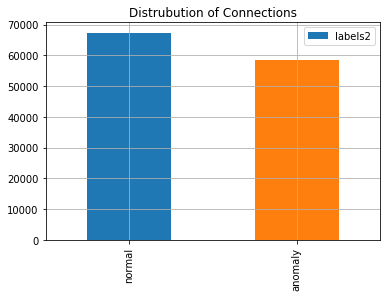

In [13]:
%matplotlib inline 
train_set.labels2.value_counts().plot(kind='bar',legend=True,grid=True,title='Distrubution of Connections')

In [17]:
test_set.labels5.value_counts()

normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: labels5, dtype: int64

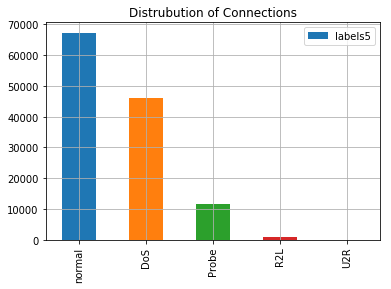

In [15]:
%matplotlib inline 
train_set.labels5.value_counts().plot(kind='bar',legend=True,grid=True,title='Distrubution of Connections')

In [16]:
pd.crosstab(train_set.protocol_type,train_set.labels2)

labels2,anomaly,normal
protocol_type,,
icmp,6982,1309
tcp,49089,53600
udp,2559,12434


In [17]:
pd.crosstab(train_set.protocol_type,train_set.labels5)

labels5,DoS,Probe,R2L,U2R,normal
protocol_type,,,,,
icmp,2847,4135,0,0,1309
tcp,42188,5857,995,49,53600
udp,892,1664,0,3,12434


In [18]:
pd.crosstab(train_set.flag,train_set.labels2)

labels2,anomaly,normal
flag,,
OTH,35,11
REJ,8540,2693
RSTO,1343,219
RSTOS0,103,0
RSTR,2275,146
S0,34497,354
S1,4,361
S2,8,119
S3,4,45


In [19]:
pd.crosstab(train_set.flag,train_set.labels5)

labels5,DoS,Probe,R2L,U2R,normal
flag,,,,,
OTH,0,35,0,0,11
REJ,5671,2869,0,0,2693
RSTO,1216,80,46,1,219
RSTOS0,0,103,0,0,0
RSTR,90,2180,5,0,146
S0,34344,153,0,0,354
S1,2,1,1,0,361
S2,5,2,1,0,119
S3,0,1,3,0,45


In [20]:
train_set.service.values

array(['ftp_data', 'other', 'private', ..., 'smtp', 'klogin', 'ftp_data'],
      dtype=object)

In [21]:
pd.crosstab(train_set.service,train_set.labels2)

labels2,anomaly,normal
service,,
IRC,1,186
X11,6,67
Z39_50,862,0
aol,2,0
auth,719,236
bgp,710,0
courier,734,0
csnet_ns,545,0
ctf,563,0


In [22]:
pd.crosstab(train_set.num_outbound_cmds,train_set.labels2)

labels2,anomaly,normal
num_outbound_cmds,,
0,58630,67343


### Testing Set

In [23]:
test_set.labels2.value_counts()

anomaly    12833
normal      9711
Name: labels2, dtype: int64

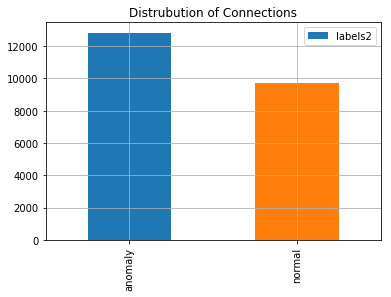

In [24]:
%matplotlib inline 
test_set.labels2.value_counts().plot(kind='bar',legend=True,grid=True,title='Distrubution of Connections')

In [25]:
test_set.labels5.value_counts()

normal    9711
DoS       7458
R2L       2754
Probe     2421
U2R        200
Name: labels5, dtype: int64

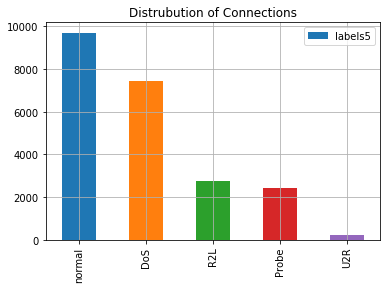

In [26]:
%matplotlib inline 
test_set.labels5.value_counts().plot(kind='bar',legend=True,grid=True,title='Distrubution of Connections')

In [27]:
pd.crosstab(test_set.num_outbound_cmds,test_set.labels2)

labels2,anomaly,normal
num_outbound_cmds,,
0,12833,9711


**As 'num_outbound_cmds' feature takes only 0.0 values in train and test, so it is dropped as redundant.**

In [28]:
def categorical_info(data):
    for col_name in data.columns:
        if data[col_name].dtypes == 'object':
            unique_cat = len(data[col_name].unique())
            print("Feature {} has {} categories ".format(col_name, unique_cat))
# compare the training set and the test set if they have the same number of categories 

for data in [train_set,train20_set,test_set,test20_set]:
    categorical_info(data)
    print('---------------------------------------------------------------')

Feature protocol_type has 3 categories 
Feature service has 70 categories 
Feature flag has 11 categories 
Feature labels5 has 5 categories 
Feature labels2 has 2 categories 
---------------------------------------------------------------
Feature protocol_type has 3 categories 
Feature service has 66 categories 
Feature flag has 11 categories 
Feature labels5 has 5 categories 
Feature labels2 has 2 categories 
---------------------------------------------------------------
Feature protocol_type has 3 categories 
Feature service has 64 categories 
Feature flag has 11 categories 
Feature labels5 has 5 categories 
Feature labels2 has 2 categories 
---------------------------------------------------------------
Feature protocol_type has 3 categories 
Feature service has 62 categories 
Feature flag has 11 categories 
Feature labels5 has 5 categories 
Feature labels2 has 2 categories 
---------------------------------------------------------------


**it's clear there is messing values in the feature ''service'' beside the training set**

## 6. Statistical Summary

In [29]:
#The describe() method shows a summary of the numerical attributes, 
train_set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
test_set.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Encoding

### One Hot Encoding for categorical variables
One hot encoding is a process by which categorical variables are converted into a form (numeric) that could be provided to ML algorithms to do a better job in prediction.

In [31]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

categorical_columns = ['protocol_type','service','flag']

class encoding(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super(encoding, self).__init__()
    
    def fit(self,X,y=None):
        return self 
    
    # Prepare new columns example:
    # protcol_type (tcp,udp,icmp) ==> protocol_type_tcp,protocol_type_udp,protocol_type_icmp 
    # so with rest columns
    def getColumnsName(self,X):
        # protocol_type
        unique_protocol_type = sorted(X.protocol_type.unique())
        str_p_type = 'protocol_type_'
        columns_protocol_type =[str_p_type+a for a in unique_protocol_type]
        # service
        unique_service = sorted(X.service.unique())
        str_service = 'service_'
        columns_service =[str_service+a for a in unique_service]
        # flag
        unique_flag = sorted(X.flag.unique())
        str_flag  = 'flag_'
        columns_flag =[str_flag+a for a in unique_flag]

        X_dummies_columns = columns_protocol_type + columns_service + columns_flag
        return X_dummies_columns
    
    def transform(self, X, y=None):
        # Get data with nonumeric value
        X_values = X[categorical_columns]
        
        # Transform categorical features into numbers using LabelEncoder
        X_values_enc  = X_values.apply(LabelEncoder().fit_transform)
        
        # OneHotEncoder
        oh_enc = OneHotEncoder()
        X_values_oh_enc = oh_enc.fit_transform(X_values_enc)
        X_cat_data = pd.DataFrame(X_values_oh_enc.toarray(), columns=self.getColumnsName(X))

        return X_cat_data

#### Before Encoding

In [32]:
train_categorical_values = train_set[categorical_columns]
train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


#### After Encoding

In [33]:
train_set_enc = encoding().transform(train_set)
train20_set_enc = encoding().transform(train20_set)
test_set_enc = encoding().transform(test_set)
test20_set_enc = encoding().transform(test20_set)

In [34]:
for data in [train_set_enc,train20_set_enc,test_set_enc,test20_set_enc]:
    description(data)
    print('---------------------------------------------------------------')

Number of samples(examples)  125973  Number of features 84
Dimension of data set  (125973, 84)
---------------------------------------------------------------
Number of samples(examples)  25192  Number of features 80
Dimension of data set  (25192, 80)
---------------------------------------------------------------
Number of samples(examples)  22544  Number of features 78
Dimension of data set  (22544, 78)
---------------------------------------------------------------
Number of samples(examples)  11850  Number of features 76
Dimension of data set  (11850, 76)
---------------------------------------------------------------


**Dimensions of training set not like others becuse of the messing values in ''service'' as we notice before, we need to add those values to the other sets.** 

In [35]:
train_set_enc.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 8. Join All Data Together

In [36]:
all_features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
     'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
     'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 
     'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
     'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
     'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
     'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 
     'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 
     'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 
     'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i',
     'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 
     'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 
     'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap',
     'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns',
     'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other',
     'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 
     'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh',
     'service_sunrpc', 'service_supdup', 'service_systat', 'service_telnet', 'service_tftp_u', 'service_tim_i', 
     'service_time', 'service_urh_i', 'service_urp_i', 'service_uucp', 'service_uucp_path', 'service_vmnet', 
     'service_whois', 'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 
     'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH', 'labels2','labels5']

class join_data(BaseEstimator, TransformerMixin):
    
    def __init__(self, native):
        self.native = native
        print("shape native ",native.shape)
        
    def fit(self,X,y=None):
        return self
    
    def addMissingValue(self, X):
        for col in self.native.columns:
            if col not in X:
                X[col] = 0.0
                #print(col)
        return X

    
    def transform(self, X,X_enc, y=None):
        # add messing values from feature ''service''
        X_ = self.addMissingValue(X_enc)
        
        # Join data with encoded data 
        X_ = X.join(X_)
        
        # Delete old columns
        X_.drop('protocol_type',axis=1,inplace=True)
        X_.drop('service',axis=1,inplace=True)
        X_.drop('flag',axis=1,inplace=True)
        
        # Reoredening features 
        X_ = X_[all_features]
        
        X_.drop('num_outbound_cmds',axis=1,inplace=True)
        
        return X_

In [37]:
train = join_data(native=train_set_enc).transform(train_set,train_set_enc)
train20 = join_data(native=train_set_enc).transform(train20_set,train20_set_enc)
test = join_data(native=train_set_enc).transform(test_set,test_set_enc)
test20 = join_data(native=train_set_enc).transform(test20_set,test20_set_enc)

shape native  (125973, 84)
shape native  (125973, 84)
shape native  (125973, 84)
shape native  (125973, 84)


In [38]:
for data in [train,train20,test,test20]:
    description(data)
    print('---------------------------------------------------------------')

Number of samples(examples)  125973  Number of features 123
Dimension of data set  (125973, 123)
---------------------------------------------------------------
Number of samples(examples)  25192  Number of features 123
Dimension of data set  (25192, 123)
---------------------------------------------------------------
Number of samples(examples)  22544  Number of features 123
Dimension of data set  (22544, 123)
---------------------------------------------------------------
Number of samples(examples)  11850  Number of features 123
Dimension of data set  (11850, 123)
---------------------------------------------------------------


In [39]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,labels2,labels5
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal,normal
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal,normal
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,anomaly,DoS
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal,normal
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,normal,normal


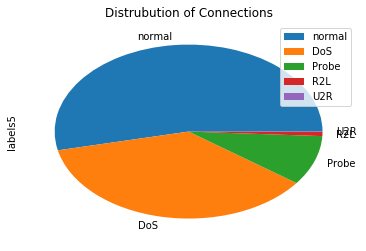

In [40]:
%matplotlib inline 
train.labels5.value_counts().plot(kind='pie',legend=True,grid=True,title='Distrubution of Connections')

In [41]:
pd.crosstab(train.protocol_type_tcp, train.labels2)

labels2,anomaly,normal
protocol_type_tcp,,
0.0,9541,13743
1.0,49089,53600


In [42]:
pd.crosstab(train.service_ftp, train.labels2)

labels2,anomaly,normal
service_ftp,,
0.0,57794,66425
1.0,836,918


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 123 entries, duration to labels5
dtypes: float64(99), int64(22), object(2)
memory usage: 118.2+ MB


In [44]:
train20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Columns: 123 entries, duration to labels5
dtypes: float64(99), int64(22), object(2)
memory usage: 23.6+ MB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Columns: 123 entries, duration to labels5
dtypes: float64(99), int64(22), object(2)
memory usage: 21.2+ MB


In [46]:
test20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Columns: 123 entries, duration to labels5
dtypes: float64(99), int64(22), object(2)
memory usage: 11.1+ MB


## 9. Save data into csv fil

In [47]:
train.to_csv("PKDDTrain+.csv", sep=',', encoding='utf-8', index=False)
train20.to_csv("PKDDTrain+_20Percent.csv", sep=',', encoding='utf-8', index=False)
test.to_csv("PKDDTest+.csv", sep=',', encoding='utf-8', index=False)
test20.to_csv("PKDDTest-21.csv", sep=',', encoding='utf-8', index=False)

## 10. Refrences

- [1](#1.Intrusion Detector Learning)  R Heady, G Luger, A Maccabe, and M Servilla. The Architecture of a Network-LevelIntrusion Detection System.Zhurnal Eksperimental’noi i Teoreticheskoi Fiziki, 0,1990.<br>

- [2](#1.Intrusion Detector Learning) M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, A detailed analysis of the KDD CUP 99 data set, 2009 IEEE Int. Conf. Comput. Intell. Security Defense Appl., 2009, pp. 53–58.<br>
